In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import os

box_layout = widgets.Layout(
    display="flex",
    flex_flow="column",
    align_items="center",
    border="1px solid #E0E0E0",
    width="400px",
    padding="25px",
    border_radius="10px"
)

button_layout = widgets.Layout(width="100%", height="40px")

upload_layout = widgets.Layout(width="100%")

title = widgets.HTML(
    "<h3 style='margin-bottom:10px;'>Upload CSV Files 👇</h3>"
)

subtitle = widgets.HTML(
    "<p style='color:gray; margin-top:0;'>Select one or more CSV files to upload and save</p>"
)

train_uploader = widgets.FileUpload(
    accept='.csv',
    multiple=True,
    layout=upload_layout
)

save_button = widgets.Button(
    description='Save Files',
    button_style='primary',
    icon='save',
    layout=button_layout
)

status = widgets.HTML("<p style='color:gray;'>Waiting for upload...</p>")

output = widgets.Output()

def save_files(change=None):
    with output:
        output.clear_output()
        
        if train_uploader.value:
            saved_files = []
            for filename, file_info in train_uploader.value.items():
                with open(filename, "wb") as f:
                    f.write(file_info['content'])
                saved_files.append(filename)
            
            status.value = f"<p style='color:green;'>Saved {len(saved_files)} file(s) 👍</p>"
        else:
            status.value = "<p style='color:red;'>⚠️ No files uploaded yet</p>"

train_uploader.observe(save_files, names='value')

save_button.on_click(save_files)

card = widgets.VBox(
    [title, subtitle, train_uploader, save_button, status],
    layout=box_layout
)

display(card)
display(output)

Output()

In [4]:
df = pd.read_csv('file.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [5]:
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
818,NaN,TA,155000
1288,Ex,TA,278000
206,TA,TA,143900
203,Gd,TA,149000
583,Gd,Gd,325000


In [6]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


### **Frequency imputation**

<Axes: xlabel='count', ylabel='GarageQual'>

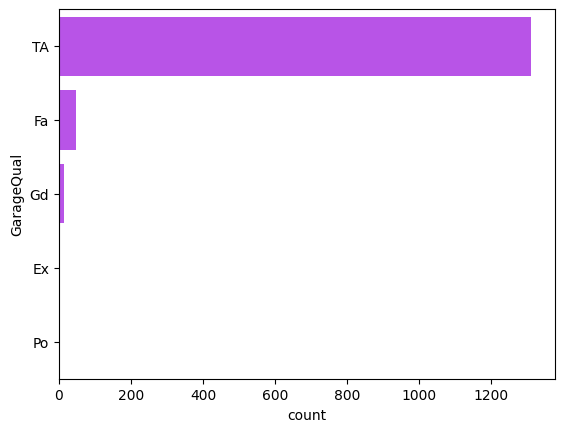

In [11]:
sb.countplot(data=df['GarageQual'], color="#c13cff")

In [9]:
df['GarageQual'].mode()

,GarageQual
0,TA


<Axes: xlabel='SalePrice', ylabel='Density'>

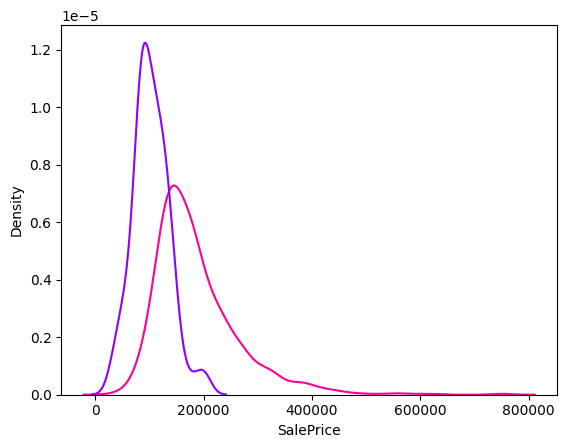

In [13]:
sb.kdeplot(data=df[df['GarageQual']=='TA']['SalePrice'], color="#ff0095")
sb.kdeplot(data=df[df['GarageQual'].isnull()]['SalePrice'], color="#9000ff")

In [14]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [24]:
df['GarageQual'] = df['GarageQual'].fillna('TA')

<Axes: xlabel='SalePrice', ylabel='Density'>

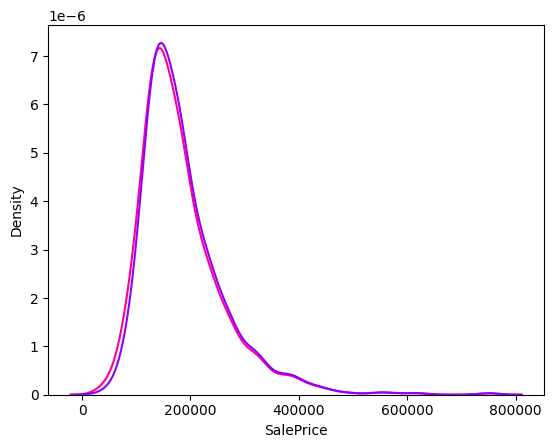

In [16]:
sb.kdeplot(data=df[df['GarageQual']=='TA']['SalePrice'], color="#ff0095")
sb.kdeplot(data=temp, color="#9000ff")

### **Conclusion**
Both graphs overlap which shows that on replacing missing places with most frequent values, results are coming positive

### **Missing category imputation**

In [17]:
df2 = pd.read_csv('file.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])

In [18]:
df2.sample(5)

,FireplaceQu,GarageQual,SalePrice
1319,NaN,TA,111000
700,Gd,TA,312500
1392,Po,TA,123000
248,NaN,TA,180000
453,NaN,TA,210000


In [19]:
df2.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


<Axes: xlabel='count', ylabel='FireplaceQu'>

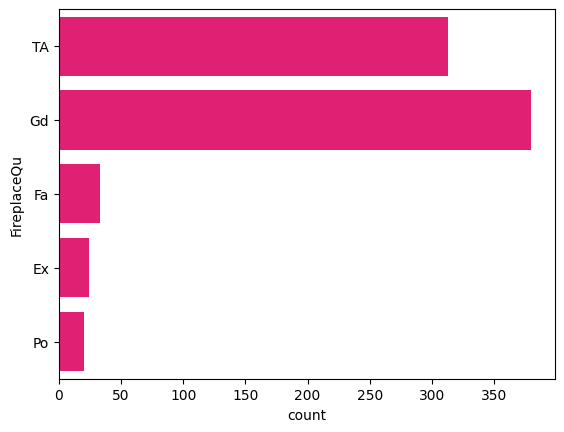

In [20]:
sb.countplot(df2['FireplaceQu'], color="#ff006f")

In [23]:
df2['FireplaceQu'] = df2['FireplaceQu'].fillna('Missing')

In [25]:
df2.isnull().sum()

,0
FireplaceQu,0
GarageQual,81
SalePrice,0


<Axes: xlabel='count', ylabel='FireplaceQu'>

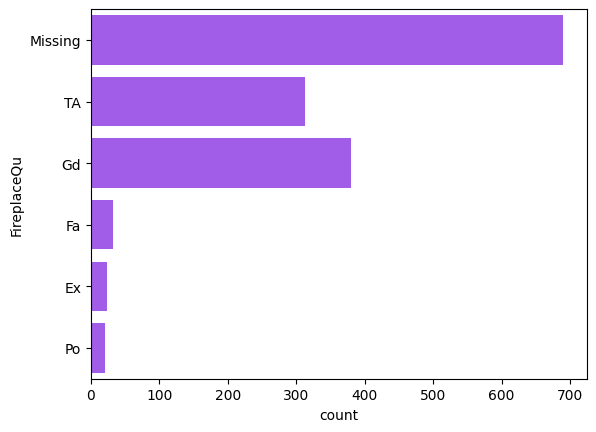

In [26]:
sb.countplot(df['FireplaceQu'], color="#a046ff")